In [1]:
#re-scale the "price" column using both z-score standardization and Min-max scaling.

#HINTS: Replace or remove the missing values in the data.

In [2]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [3]:
filepath = "datasets/DC_Properties.csv"

df = pd.read_csv(filepath)
df.count()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [4]:
df.dropna()
df

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
5,5,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,...,-77.039715,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
6,6,1,0,Warm Cool,Y,2.0,5,2,1917.0,1988.0,...,-77.041055,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
7,7,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,2011.0,...,-77.040129,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
8,8,3,1,Warm Cool,Y,2.0,7,3,1908.0,2008.0,...,-77.039903,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
9,9,1,1,Hot Water Rad,Y,1.0,6,2,1908.0,1979.0,...,-77.040081,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [5]:
df.notnull().count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             158957
ROOMS                 158957
BEDRM                 158957
AYB                   158957
YR_RMDL               158957
EYB                   158957
STORIES               158957
SALEDATE              158957
PRICE                 158957
QUALIFIED             158957
SALE_NUM              158957
GBA                   158957
BLDG_NUM              158957
STYLE                 158957
STRUCT                158957
GRADE                 158957
CNDTN                 158957
EXTWALL               158957
ROOF                  158957
INTWALL               158957
KITCHENS              158957
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM             158957
LIVING_GBA            158957
FULLADDRESS           158957
CITY          

In [6]:
df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,...,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,45887.077707,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,...,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,...,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


In [7]:
import numpy as np
df['PRICE'].head()

0    1095000.0
1          NaN
2    2100000.0
3    1602000.0
4          NaN
Name: PRICE, dtype: float64

In [8]:
df['PRICE']

0         1095000.0
1               NaN
2         2100000.0
3         1602000.0
4               NaN
5         1950000.0
6               NaN
7         1050000.0
8         1430000.0
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14        1325000.0
15              NaN
16        1240000.0
17              NaN
18              NaN
19         592250.0
20          33232.0
21              NaN
22         907400.0
23        1065000.0
24        1100000.0
25          20000.0
26              NaN
27         703700.0
28              NaN
29        1210000.0
            ...    
158927          NaN
158928     632400.0
158929     574000.0
158930     365000.0
158931     405000.0
158932     505000.0
158933     520000.0
158934     499900.0
158935     451000.0
158936     564900.0
158937          NaN
158938     660000.0
158939     380000.0
158940          NaN
158941          NaN
158942          NaN
158943     539000.0
158944     908500.0
158945     450000.0


In [9]:
df['PRICE']

0         1095000.0
1               NaN
2         2100000.0
3         1602000.0
4               NaN
5         1950000.0
6               NaN
7         1050000.0
8         1430000.0
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14        1325000.0
15              NaN
16        1240000.0
17              NaN
18              NaN
19         592250.0
20          33232.0
21              NaN
22         907400.0
23        1065000.0
24        1100000.0
25          20000.0
26              NaN
27         703700.0
28              NaN
29        1210000.0
            ...    
158927          NaN
158928     632400.0
158929     574000.0
158930     365000.0
158931     405000.0
158932     505000.0
158933     520000.0
158934     499900.0
158935     451000.0
158936     564900.0
158937          NaN
158938     660000.0
158939     380000.0
158940          NaN
158941          NaN
158942          NaN
158943     539000.0
158944     908500.0
158945     450000.0


In [10]:
 df['PRICE'].dropna()

0         1095000.0
2         2100000.0
3         1602000.0
5         1950000.0
7         1050000.0
8         1430000.0
14        1325000.0
16        1240000.0
19         592250.0
20          33232.0
22         907400.0
23        1065000.0
24        1100000.0
25          20000.0
27         703700.0
29        1210000.0
32         130500.0
37         339500.0
40        1050000.0
41        1550000.0
42        1599900.0
43        1700000.0
44        1700000.0
45         450000.0
46         846000.0
48         348500.0
50         849000.0
52        1312000.0
54         390000.0
55         772500.0
            ...    
158918     839000.0
158919     915500.0
158920     880000.0
158921    1120000.0
158924     269000.0
158926     385000.0
158928     632400.0
158929     574000.0
158930     365000.0
158931     405000.0
158932     505000.0
158933     520000.0
158934     499900.0
158935     451000.0
158936     564900.0
158938     660000.0
158939     380000.0
158943     539000.0
158944     908500.0


In [11]:
#Method 1: manual calculation of z-scores for 'Glucose' column

#mean for the column
mean = df['PRICE'].mean()

#standard deviation of the column
std = df['PRICE'].std()

#each value in column minus the mean and then divide by the standard deviation
zprice = (df['PRICE'] - mean)/std

In [12]:
mean, std

(931351.5949336156, 7061324.955612032)

In [13]:
#Method 2: use scikit-learn to calculate z-scores

#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()

#fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed
#'Glucose' is in double set of square brackets in order to make it a dataframe
price_zscore = scaler.fit_transform(df[['PRICE']])

In [14]:
price_zscore.mean(), price_zscore.std()

(nan, nan)

In [15]:
price_z_col = pd.Series(price_zscore.reshape(-1))

In [16]:
price_z_col

0         0.023175
1              NaN
2         0.165501
3         0.094975
4              NaN
5         0.144258
6              NaN
7         0.016803
8         0.070617
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14        0.055747
15             NaN
16        0.043710
17             NaN
18             NaN
19       -0.048023
20       -0.127189
21             NaN
22       -0.003392
23        0.018927
24        0.023884
25       -0.129063
26             NaN
27       -0.032239
28             NaN
29        0.039461
            ...   
158927         NaN
158928   -0.042337
158929   -0.050607
158930   -0.080205
158931   -0.074540
158932   -0.060379
158933   -0.058254
158934   -0.061101
158935   -0.068026
158936   -0.051896
158937         NaN
158938   -0.038428
158939   -0.078081
158940         NaN
158941         NaN
158942         NaN
158943   -0.055564
158944   -0.003236
158945   -0.068168
158946   -0.063161
158947   -0.086578
158948   -0.

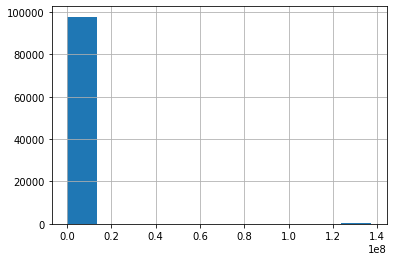

In [17]:
df['PRICE'].hist()

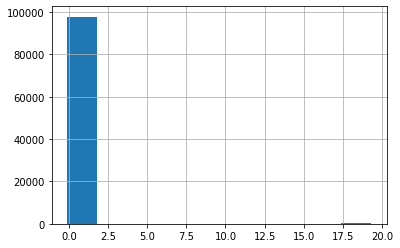

In [18]:
price_z_col.hist()

In [19]:
newdf = df['PRICE'].dropna()
newdf

0         1095000.0
2         2100000.0
3         1602000.0
5         1950000.0
7         1050000.0
8         1430000.0
14        1325000.0
16        1240000.0
19         592250.0
20          33232.0
22         907400.0
23        1065000.0
24        1100000.0
25          20000.0
27         703700.0
29        1210000.0
32         130500.0
37         339500.0
40        1050000.0
41        1550000.0
42        1599900.0
43        1700000.0
44        1700000.0
45         450000.0
46         846000.0
48         348500.0
50         849000.0
52        1312000.0
54         390000.0
55         772500.0
            ...    
158918     839000.0
158919     915500.0
158920     880000.0
158921    1120000.0
158924     269000.0
158926     385000.0
158928     632400.0
158929     574000.0
158930     365000.0
158931     405000.0
158932     505000.0
158933     520000.0
158934     499900.0
158935     451000.0
158936     564900.0
158938     660000.0
158939     380000.0
158943     539000.0
158944     908500.0


In [20]:
minmax_sc = MinMaxScaler()

In [21]:
#use MinMaxScaler function and fit_transform function on the 'Glucose' column
price_minmax = minmax_sc.fit_transform(df[['PRICE']])

In [22]:
#mean and standard deviation of Min-Max 'Glucose' column
price_minmax.mean(), price_minmax.std()

(nan, nan)

In [23]:
#verify the range is between 0 and 1
price_minmax.min(), price_minmax.max()

(nan, nan)

In [24]:
df = df.replace(0, np.nan)
df = df.dropna(how='all', axis=0)
#df = df.replace(np.nan, 0)
df['PRICE']

0         1095000.0
1               NaN
2         2100000.0
3         1602000.0
4               NaN
5         1950000.0
6               NaN
7         1050000.0
8         1430000.0
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14        1325000.0
15              NaN
16        1240000.0
17              NaN
18              NaN
19         592250.0
20          33232.0
21              NaN
22         907400.0
23        1065000.0
24        1100000.0
25          20000.0
26              NaN
27         703700.0
28              NaN
29        1210000.0
            ...    
158927          NaN
158928     632400.0
158929     574000.0
158930     365000.0
158931     405000.0
158932     505000.0
158933     520000.0
158934     499900.0
158935     451000.0
158936     564900.0
158937          NaN
158938     660000.0
158939     380000.0
158940          NaN
158941          NaN
158942          NaN
158943     539000.0
158944     908500.0
158945     450000.0


In [34]:
newdf = df['PRICE'].dropna()
newdf

0         1095000.0
2         2100000.0
3         1602000.0
5         1950000.0
7         1050000.0
8         1430000.0
14        1325000.0
16        1240000.0
19         592250.0
20          33232.0
22         907400.0
23        1065000.0
24        1100000.0
25          20000.0
27         703700.0
29        1210000.0
32         130500.0
37         339500.0
40        1050000.0
41        1550000.0
42        1599900.0
43        1700000.0
44        1700000.0
45         450000.0
46         846000.0
48         348500.0
50         849000.0
52        1312000.0
54         390000.0
55         772500.0
            ...    
158918     839000.0
158919     915500.0
158920     880000.0
158921    1120000.0
158924     269000.0
158926     385000.0
158928     632400.0
158929     574000.0
158930     365000.0
158931     405000.0
158932     505000.0
158933     520000.0
158934     499900.0
158935     451000.0
158936     564900.0
158938     660000.0
158939     380000.0
158943     539000.0
158944     908500.0


In [46]:
coln = list(newdf(COLUMNS['PRICE'])

KeyError: 'PRICE'

In [40]:
#show z-score standardization for all columns

#list to hold column names
colnames = list(newdf.columns)

#calculate z-scores
zscore_df = pd.DataFrame(scaler.fit_transform(newdf), columns = colnames)

#plot frequency distribution with same scale range
zscore_df.hist(figsize=(10,10), sharex=True)

AttributeError: 'Series' object has no attribute 'columns'

In [41]:
#MinMaxScaler function will calculate the formula
minmax_sc = MinMaxScaler()

In [42]:
#use MinMaxScaler function and fit_transform function on the 'Glucose' column
newdf_minmax = minmax_sc.fit_transform(newdf[['PRICE']])

KeyError: "None of [Index(['PRICE'], dtype='object')] are in the [index]"